# Transforms

In [34]:
from torchvision.io import read_image
import matplotlib.pyplot as plt

Transforms are common image transformations that can be chained together using `Compose`. Additionally, there is the `torchvision.transforms.functional` module that is useful for complex transformation pipelines.

Transforms accept:
1. PIL Image
2. Tensor Image - `(C,H,W)`
3. Batch of Tensor Image - `(B,C,H,W)`

Transforms can also be chained together via `torch.nn.Sequential` and this method is compatible with TorchScript while `Compose` is not.

```
transforms = torch.nn.Sequential(
    transforms.CenterCrop(10),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
)
scripted_transforms = torch.jit.script(transforms)
```

The available transforms are:
1. `torchvision.transforms.CenterCrop(size)`

2. `torchvision.transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0)`
3. `torchvision.transforms.FiveCrop(size)`
4. `torchvision.transforms.Grayscale(num_output_channels=1)`
5. `torchvision.transforms.Pad(padding, fill=0, padding_mode='constant')`
6. `torchvision.transforms.RandomAffine(degrees, translate=None, scale=None, shear=None, interpolation=<InterpolationMode.NEAREST: 'nearest'>, fill=0, fillcolor=None, resample=None)`
7. `torchvision.transforms.RandomApply(transforms, p=0.5)`
8. `torchvision.transforms.RandomCrop(size, padding=None, pad_if_needed=False, fill=0, padding_mode='constant')`
9. `torchvision.transforms.RandomGrayscale(p=0.1)`
10. `torchvision.transforms.RandomHorizontalFlip(p=0.5)`
11. `torchvision.transforms.RandomPerspective(distortion_scale=0.5, p=0.5, interpolation=<InterpolationMode.BILINEAR: 'bilinear'>, fill=0)`
12. `torchvision.transforms.RandomResizedCrop(size, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=<InterpolationMode.BILINEAR: 'bilinear'>)`
13. `torchvision.transforms.RandomRotation(degrees, interpolation=<InterpolationMode.NEAREST: 'nearest'>, expand=False, center=None, fill=0, resample=None)`
14. `torchvision.transforms.RandomVerticalFlip(p=0.5)`
15. `torchvision.transforms.Resize(size, interpolation=<InterpolationMode.BILINEAR: 'bilinear'>)`
16. `torchvision.transforms.Scale(*args, **kwargs)`
17. `torchvision.transforms.TenCrop(size, vertical_flip=False)`
18. `torchvision.transforms.GaussianBlur(kernel_size, sigma=(0.1, 2.0))`

The above are transforms that work out of the box. However, for fine grained control, we use functional transforms as:

```
import torchvision.transforms.functional as TF
import random

def my_segmentation_transforms(image, segmentation):
    if(random.random() > 0.5):
        angle = random.randint(-30,30)
        segmentation = TF.rotate(image,angle)
    return image,segmentation
```

In [35]:
image = read_image("test_transform.png")

In [46]:
image = image[0] #take only one channel

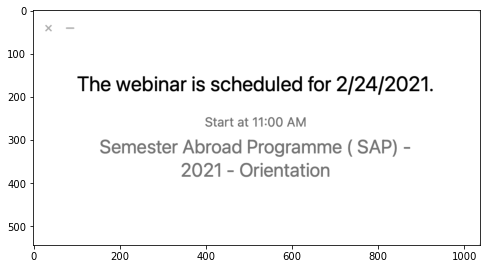

In [48]:
figure = plt.figure(figsize=(8, 8))
plt.imshow(image.squeeze(), cmap="gray")

In [49]:
import torchvision

In [51]:
import torchvision.transforms.functional as TF

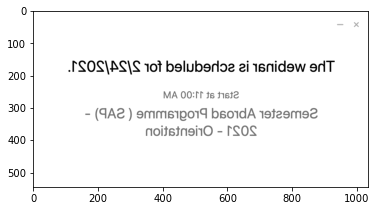

In [53]:
plt.imshow(TF.hflip(image).squeeze(), cmap="gray")

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)

Turns out that `TF.rotate` only ta

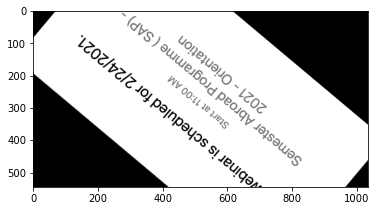

In [67]:
plt.imshow(TF.rotate(read_image("test_transform.png"),500)[0].squeeze(), cmap="gray")

# Building the Neural Network

In [2]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [3]:
torch.cuda.is_available()

False

Every `nn.Module` subclass, like the one below implements the operations on input data in the `forward` method. The `__init__` just defines the structure of the network.

In [10]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork,self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10),
            nn.ReLU()
        )
    def forward(self,x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [11]:
model = NeuralNetwork().to('cpu')

In [12]:
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


### Lemme try a little something differently:

In [7]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork,self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10),
            nn.ReLU()
        )
    def forward(self,x):
        x = nn.Flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [8]:
model = NeuralNetwork().to('cpu')

In [9]:
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


So, I have to specify a layer in the `__init__` function or it's not a layer.

### Back to the main thing:

To use the model we just created, we pass the input data to the `model` instance of the class as `model(X)`. This calls the `forward` method with some background ops (the documentation just points ot code on GitHub and it's a little unclear as to what they're trying to say).

In [13]:
X = torch.rand(1,28,28,device='cpu')

In [16]:
X.shape

torch.Size([1, 28, 28])

In [23]:
logits = model(X)
pred_prob = nn.Softmax(dim=1)(logits)
y_pred = pred_prob.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([5])


To see what's happening, we'll create a minibatch of size `(3,28,28)` and see what happens as we funnel it through the different layers of the network.

In [21]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


## Layer: `nn.Flatten`

In [22]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


## Layer: `nn.Linear`

### Description

Applies a linear transformation to the incoming data: $y = xA^T + b$. It's called as `torch.nn.Linear(in_features, out_features, bias=True)`. Input has the shape $(N,*,H_{in})$ and output has the shape $(N,*,H_{out})$. The variables are:
1. `Linear.weight` (Shape:`(out_features,in_features)`): Initialized from $$\mathcal{U}(-\sqrt{k},\sqrt{k}), k = \frac{1}{{in\_features}}$$
2. `Linear.bias` (Shape:`(out_features)`): Initialized from $$\mathcal{U}(-\sqrt{k},\sqrt{k}), k = \frac{1}{{in\_features}}$$

### In Action

In [25]:
layer1 = nn.Linear(in_features=28*28,out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


## Layer: `nn.ReLU`

To see all the activations in `torch.nn.modules.activation`, check out: https://pytorch.org/docs/stable/_modules/torch/nn/modules/activation.html#ReLU

### Description

Applies the ReLU function: $$ReLU(x)=max(0,x)$$

It only has one parameter, `torch.nn.ReLU(inplace=False)`. Inplace defaults to false but it can be done.

In [26]:
print(nn.modules.activation.)

<module 'torch.nn.modules.activation' from '/Users/gunjanpayal/miniforge3/envs/torch/lib/python3.8/site-packages/torch/nn/modules/activation.py'>


### In Action:

In [27]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-4.7966e-01, -4.5044e-01, -1.7447e-01, -7.3643e-01,  6.7851e-04,
         -1.4303e-01, -9.3088e-02, -2.5962e-01, -2.4064e-01, -2.0340e-01,
          7.5290e-01, -5.2074e-01,  5.8644e-02,  1.1683e-01,  1.0474e-01,
         -3.3378e-02, -3.1018e-01, -9.0910e-02, -4.4772e-03,  1.2422e-01],
        [-3.5695e-01, -1.2954e-01, -1.5697e-01, -4.3011e-01,  1.1016e-02,
          7.7357e-02, -3.9091e-01, -3.3335e-01, -2.1129e-01, -3.4215e-01,
          6.7764e-01, -4.7668e-01,  3.6057e-01, -1.2899e-01,  3.3172e-01,
          4.1900e-01, -4.3121e-01, -1.1155e-01, -8.7533e-02, -2.3641e-02],
        [-2.7163e-01, -8.1381e-02, -3.4307e-01, -2.4799e-01,  2.3042e-01,
         -2.4282e-01, -4.7104e-01, -3.4625e-01, -1.6722e-01, -3.5384e-01,
          6.5056e-01, -3.0403e-01,  1.6956e-01, -6.9956e-02,  1.5738e-01,
          2.4541e-01, -7.3486e-01, -8.2821e-02, -2.8890e-01, -2.1865e-01]],
       grad_fn=<AddmmBackward>)


After ReLU: tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

## Layer: `nn.Sequential`

`nn.Sequential` is an ordered container of modules. It's good for putting together a quick and dirty network.

```
model = nn.Sequential(
          nn.Conv2d(1,20,5),
          nn.ReLU(),
          nn.Conv2d(20,64,5),
          nn.ReLU()
        )
```

```
model = nn.Sequential(OrderedDict([
          ('conv1', nn.Conv2d(1,20,5)),
          ('relu1', nn.ReLU()),
          ('conv2', nn.Conv2d(20,64,5)),
          ('relu2', nn.ReLU())
        ]))
```

The documentation doesn't say much at all about `nn.Sequential`. It's just a couple of paragraphs.

## Layer: `nn.Softmax`

Already know what this does. It takes the logits and converts them to probabilities. Child's play.

In [28]:
m = nn.Softmax(dim=1)
input = torch.randn(2,3)
output = m(input)

In [29]:
output

tensor([[0.2929, 0.5593, 0.1477],
        [0.5907, 0.2172, 0.1921]])

In [30]:
input

tensor([[ 0.1186,  0.7654, -0.5658],
        [ 2.3571,  1.3568,  1.2338]])

The dimension specifies the direction along which the probabilities should sum to 1.